In [52]:
import pandas as pd
import numpy as np
import datetime
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import pysal
import shapely
import fiona
from pyproj import Proj, transform
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# read data
dt1 = pd.read_csv('uber-raw-data-apr14.csv')
dt2 = pd.read_csv('uber-raw-data-sep14.csv')

In [5]:
# datetime formats
fmt1 = '%m/%d/%Y %H:%M:%S'
fmt2 = '%Y-%m-%d %H:%M:%S'
# convert datetime in strings to timestamp
dt1['Date/Time'] = dt1['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, fmt1))
dt2['Date/Time'] = dt2['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, fmt1))

In [8]:
dt1.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [9]:
dt2.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [113]:
# read in census tracts data
#blocks = gpd.read_file('../census/nycb2010_16d/nycb2010.shp')
tracts = gpd.read_file('../census/nyct2010_16d/nyct2010.shp')

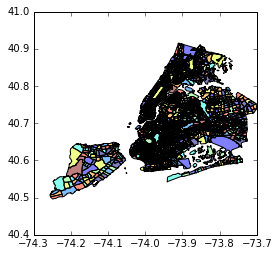

In [74]:
tracts.plot()

In [114]:
def defineloc(dt,ct):
    ''' for dataframe dt and census tract file ct,
    find which BoroCT2010 code each row of dt belongs to.
    If no corresponding census tract info can be found,
    return np.nan
    '''
    dt_ct = []
    # make sure census tract file applies lat lon projection
    latlon_proj = fiona.crs.from_epsg(4326)
    ct1 = ct.to_crs(latlon_proj)
    shape = ct.geometry.map(shapely.geometry.asShape)
    
    # loop over rows in dt
    for j in range(0, len(dt)):
        sptrip = dt.iloc[j,:]
        point = shapely.geometry.Point((sptrip.Lon, sptrip.Lat))
        shape = ct1.ix[:,'geometry']
        res = ct1[shape.contains(point)]
        if len(res) != 0:
            dt_ct.append(res.iloc[0, 0])
        # if no census tract can be found:    
        else:
            dt_ct.append(np.nan)
    return dt_ct

In [ ]:
dt1['ct'] = defineloc(dt1, tracts)